In [21]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
%matplotlib inline
import math

<a id='content'></a>
# Contents
1. [Data Processing](#data_processing)
2. [Estimator, Loss Function, Empirical Risk](#estimator)

    3. [Closed Form](#closed_form)
    4. [Gradient Descent](#gd)
    5. [Stochastic Gradient Descent](#sgd)
    6. [Polynomial Regression](#pr)

<a id='data_processing'></a>
# Data

### Load the data and plot it.

Input Path Location of file below:

In [5]:
import pandas as pd

inputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW1/data/2/hw1x.dat', names=['inputs'])
outputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW1/data/2/hw1y.dat', names=['outputs'])

### Convert DataFrame to Array 

In [6]:
x_input = inputs.as_matrix(columns=inputs.columns[0:])
y_output = outputs.as_matrix(columns=outputs.columns[0:])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0, 0.5, 'y')

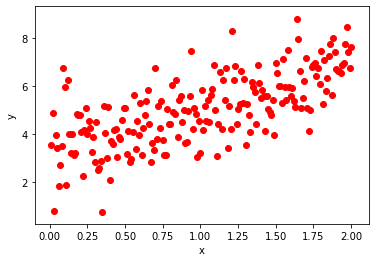

In [7]:
for i, x in enumerate(x_input):
    plt.scatter(x, y_output[i], color='r')
    
plt.xlabel('x')
plt.ylabel('y')

###  Add a column vector of 1s to the inputs.


In [12]:
ones = np.ones((inputs.shape[0], 1))

In [13]:
inputs['1'] = ones
inputsx = inputs[['1','inputs']]
inputsx.head()
xi = inputsx.as_matrix(columns=inputsx.columns[0:])


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


<a id='estimator'></a>
### Estimator
![alt text](estimator.png "Title")

### Loss: Distance

![alt text](losss.png "Title")

In [23]:
def loss(x, y, w):
    return math.pow((y - np.dot(w, x)), 2)/2

### Empirical Risk
![alt text](empirical_risk.png "Title")

In [32]:
def risk(X, Y, w):
    n = X.shape[0]
    total_loss = 0
    for i in range(n):
        total_loss += loss(X[i], Y[i], w)
    return total_loss/n

<a id='closed_form'></a>
## 1. Closed Form
[Back to Content](#content)
![alt text](closed_form2.png "Title")
![alt text](closed_form1.png "Title")

In [25]:

def closed_form(X, Y):
    n = X.shape[0]
    XT = X.transpose()
    
    b = 1/n*np.matmul(XT,Y)
    A = 1/n*np.matmul(XT,X)
    ainv = np.linalg.inv(A)
    
    w = np.matmul(ainv, b)
    return w 
    

## Prediction
Closed Form on given data:

In [26]:
wx = closed_form(xi, y_output)
print("theta from closed form solution: ",wx)

theta from closed form solution:  [[3.2447227 ]
 [1.78157138]]


Plot both the linear regression line and the data on the same graph.

Text(0, 0.5, 'y')

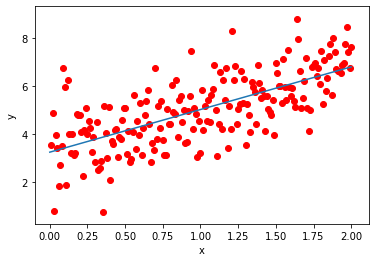

In [27]:
for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
plt.plot(x, wx[0] + wx[1]*x)
#plt.ylim(-0.5, 10)
plt.xlabel('x')
plt.ylabel('y')


Training error in 2(b)

<a id='gd'></a>
## 2. Gradient Descent
[Back to Content](#content)

In [33]:
def gradient_descent(X, Y, n, l):
    k = -1
    w = np.zeros(len(X[0]))
    eta = l
    epoch = n
    least_error = 10000
    final_theta = w
    errors = []
    
    
    for t in range(epoch):
        
        for i, xx in enumerate(X):
            #k = k+1
            #eta = 1/(k+1)
            #print(i, xx)
            w = w +  eta*(Y[i]-np.dot(w, xx))*xx 
        errors.append(risk(X, Y, w))
        if(least_error>risk(X, Y, w)):
            least_error = risk(X, Y, w)
            final_theta = w
    #print(errors)
    return w, least_error

theta after 100 iterations =  [3.13074422 1.96402963]  and least error =  0.5856035770929657


Text(0.5, 1.0, 'Linear Regression using Gradient Descent')

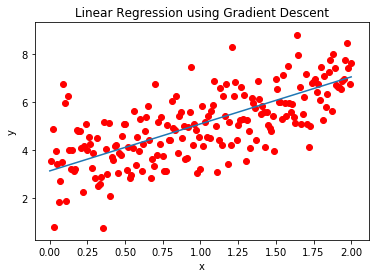

In [35]:
wgd = gradient_descent(xi, y_output, 100, 0.01)
print("theta after 100 iterations = ",wgd[0], " and least error = ", wgd[1])

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
plt.plot(x, wgd[0][0] + wgd[0][1]*x)
#plt.ylim(-0.5, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')



<a id='sgd'></a>
## 3. Stochastic Gradient Descent
[Back to Content](#content)
![alt text](sgd.png "Title")

In [49]:
import random

def diff(w, x, y):
    return (y - np.dot(w, x))*x

def stochastic_gradient_descent(X, Y, n, *eta):
    
    w = np.zeros(len(X[0]))
    
    final_theta = w
    
    least_error = 100000
    
    k = -1
    errors_w = []
    
    for t in range(n):
        
        index = random.randrange(X.shape[0])
        
        k = k+1
        if not eta:
            eta_used = 1/(1+k)
        else:
            eta_used = eta
            
        w = w + (eta*diff(w, X[index], Y[index]))
        
        if(least_error>risk(X, Y, w)):
            least_error = risk(X, Y, w)
            final_theta = w
        errors_w.append(risk(X, Y, w))
    
    plt.plot(errors_w)
    plt.xlabel('Iterations')
    plt.ylabel('Total Empirical Risk')
    plt.title('Empirical Risk reduced with iterations')
    return final_theta, least_error

theta after 50 iterations =  [2.37056081 2.51229176]  and least error =  0.6800207256286391


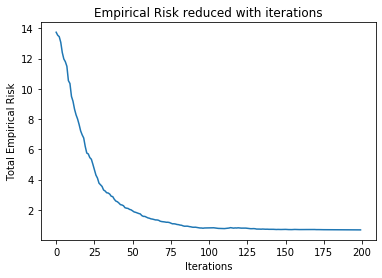

In [50]:
wsgd = stochastic_gradient_descent(xi, y_output, 200, 0.01)
print("theta after 50 iterations = ",wsgd[0], " and least error = ", wsgd[1])


Text(0.5, 1.0, 'Linear Regression using Stochastic Gradient Descent')

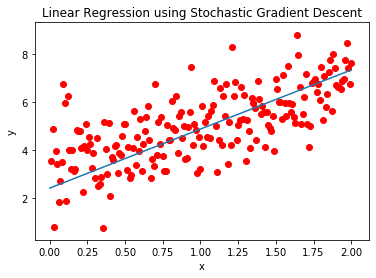

In [46]:
for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
plt.plot(x, wsgd[0][0] + wsgd[0][1]*x)
#plt.ylim(-0.5, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using Stochastic Gradient Descent')


<a id='pr'></a>
## 4. Polynomial Regression
[Back to Content](#content)

In [55]:

def PolyRegress(xnew,y,d):
    n = xnew.shape[0]
    x = xnew.copy()
    for i in range(d-1):
        powered = xnew** (2+i)
        x = np.concatenate((x, powered), 1)
    ones = np.ones((n, 1))
    x = np.concatenate((ones, x), axis=1)
    
    w = closed_form(x, y)
    
    return w


In [56]:
def training_error_d(xnew,y,d):
    n = xnew.shape[0]
    x = xnew.copy()
    for i in range(2, d+1):
        powered = np.power(xnew, i)
        x = np.concatenate((x, powered), axis=1)
    ones = np.ones((n, 1))
    x = np.concatenate((ones, x), axis=1)
    w = closed_form(x, y)
    
   
    error = 0
    
    wnew = w.transpose();
    #print(wnew[0])
    
    for i, xx in enumerate(x):
        #print(xx)
        error = error + math.pow(y[i]-np.dot(wnew[0], xx), 2)/2
    return error/n

    


In [59]:
def getCoordinates(xnew,y,d):
    n = xnew.shape[0]
    x = xnew.copy()
    for i in range(d-1):
        powered = xnew** (2+i)
        x = np.concatenate((x, powered), 1)
    ones = np.ones((n, 1))
    x = np.concatenate((ones, x), axis=1)
    
    w = closed_form(x, y)
    return np.dot(w.transpose(), x.transpose())

### 2nd Order

w2:  [[3.58076915 0.78341361 0.49659591]]
error2:  0.5703016121648224


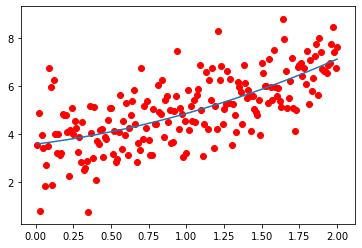

In [60]:
w2 = PolyRegress(x_input, y_output, 2)
print("w2: ",w2.transpose())
for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
y_coord = getCoordinates(x_input, y_output, 2)
plt.plot(x_input, y_coord.transpose())


#plt.ylim(-0.5, 10)


error2 = training_error_d(x_input,y_output,2)
print("error2: ",error2)

### 3rd Order

w3:  [[3.52394943 1.11846512 0.08090267 0.13787504]]
error3:  0.5700844364691353


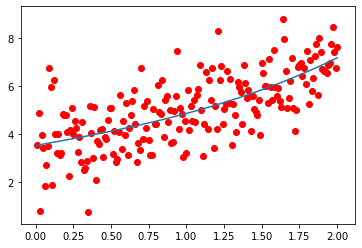

In [61]:
w3 = PolyRegress(x_input, y_output, 3)
print("w3: ",w3.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
y_coord = getCoordinates(x_input, y_output, 3)
plt.plot(x_input, y_coord.transpose())



error3 = training_error_d(x_input,y_output,3)
print("error3: ",error3)

### 4th Order

w4:  [[ 3.85376334 -2.09126966  7.22513464 -5.38187521  1.3730722 ]]
error4:  0.5646163879286425


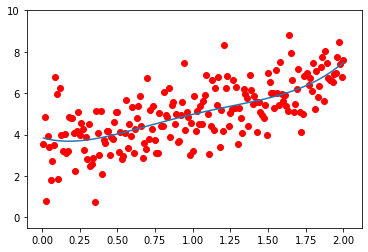

In [62]:
w4 = PolyRegress(x_input, y_output, 4)
print("w4: ",w4.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
#plt.plot(x, w4[0] + w4[1]*x + w4[2]*(x**2) + w4[3]*(x**3) + w4[4]*(x**4))
plt.ylim(-0.5, 10)
y_coord = getCoordinates(x_input, y_output, 4)
plt.plot(x_input, y_coord.transpose())




error4 = training_error_d(x_input,y_output,4)
print("error4: ",error4)

### 5th Order

w5:  [[ 3.7181433  -0.1354222   0.48154349  3.53113473 -3.60926334  0.99150956]]
error5:  0.5638968184749199


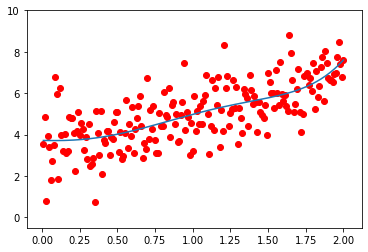

In [63]:
w5 = PolyRegress(x_input, y_output, 5)
print("w5: ",w5.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
x = np.linspace(0,2,100) # 100 linearly spaced numbers
plt.ylim(-0.5, 10)
y_coord = getCoordinates(x_input, y_output, 5)
plt.plot(x_input, y_coord.transpose())




error5 = training_error_d(x_input,y_output,5)
print("error5: ",error5)

### 6th Order

w6:  [[  3.43194652   5.56010881 -27.43134436  58.72902212 -54.95621252
   23.44890145  -3.72427726]]
error6:  0.5613433038902955


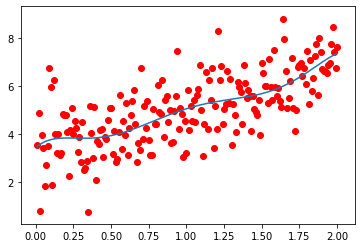

In [64]:
w6 = PolyRegress(x_input, y_output, 6)
print("w6: ",w6.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
y_coord = getCoordinates(x_input, y_output, 6)
plt.plot(x_input, y_coord.transpose())


error6 = training_error_d(x_input,y_output,6)
print("error6: ",error6)

### 7th Order


w7:  [[   2.98164398   17.311469   -104.72228096  270.37451366 -343.19084437
   229.48681988  -77.69332837   10.51443513]]
error7:  0.5562352515819492


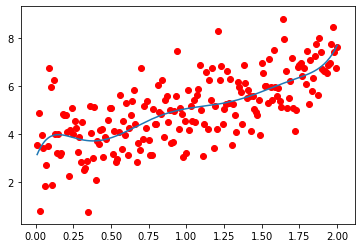

In [65]:
w7 = PolyRegress(x_input, y_output, 7)
print("w7: ",w7.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
y_coord = getCoordinates(x_input, y_output, 7)
plt.plot(x_input, y_coord.transpose())


error7 = training_error_d(x_input,y_output,7)
print("error7: ",error7)

### 8th Order

w8:  [[   2.63574435   28.70150041 -201.17746419  617.80783868 -987.05573797
   893.36433029 -462.31504273  127.58306491  -14.56077446]]
error8:  0.5537805799713973


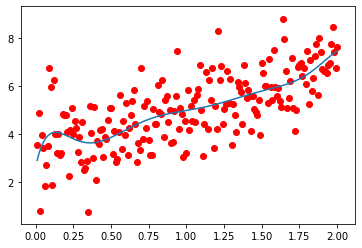

In [66]:
w8 = PolyRegress(x_input, y_output, 8)
print("w8: ",w8.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
y_coord = getCoordinates(x_input, y_output, 8)
plt.plot(x_input, y_coord.transpose())


error8 = training_error_d(x_input,y_output,8)
print("error8: ",error8)

### 9th Order

w9:  [[    2.41015046    37.81569886  -297.46472883  1057.48095131
  -2043.76023865  2357.71334076 -1672.90208435   716.63394547
   -170.14680862    17.20135069]]
error9:  0.5529231603812612


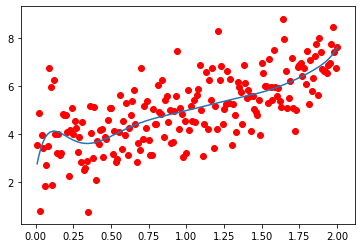

In [67]:
w9 = PolyRegress(x_input, y_output, 9)
print("w9: ",w9.transpose())

for i, z in enumerate(x_input):
    plt.scatter(z, y_output[i], color='r')
    
    
y_coord = getCoordinates(x_input, y_output, 9)
plt.plot(x_input, y_coord.transpose())


error9 = training_error_d(x_input,y_output,9)
print("error9: ",error9)